In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

#### Read data

In [2]:
data = pd.read_csv('C:/Users/lisab/OneDrive/Desktop/DA_labs/Week_7/Lesson/learningSet.csv')

C:\Users\lisab\AppData\Local\Temp\ipykernel_3292\911819598.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:/Users/lisab/OneDrive/Desktop/DA_labs/Week_7/Lesson/learningSet.csv')


In [3]:
print(data.shape)
#data.head(10)

(95412, 481)


#### Get all categorical columns

In [4]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A


#### Check for null values

In [5]:
pd.set_option('display.max_rows', None)
categorical.isna().sum()*100/len(categorical)

OSOURCE     0.000000
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
PVASTATE    0.000000
NOEXCH      0.000000
RECINHSE    0.000000
RECP3       0.000000
RECPGVG     0.000000
RECSWEEP    0.000000
MDMAUD      0.000000
DOMAIN      0.000000
CLUSTER     0.000000
AGEFLAG     0.000000
HOMEOWNR    0.000000
CHILD03     0.000000
CHILD07     0.000000
CHILD12     0.000000
CHILD18     0.000000
GENDER      0.000000
DATASRCE    0.000000
SOLP3       0.000000
SOLIH       0.000000
MAJOR       0.000000
GEOCODE     0.000000
COLLECT1    0.000000
VETERANS    0.000000
BIBLE       0.000000
CATLG       0.000000
HOMEE       0.000000
PETS        0.000000
CDPLAY      0.000000
STEREO      0.000000
PCOWNERS    0.000000
PHOTO       0.000000
CRAFTS      0.000000
FISHER      0.000000
GARDENIN    0.000000
BOATS       0.000000
WALKER      0.000000
KIDSTUFF    0.000000
CARDS       0.000000
PLATES      0.000000
LIFESRC     0.000000
PEPSTRFL    0.000000
RFA_2       0.000000
RFA_3       0.000000
RFA_4       0

##### Just the column GEOCODE2 has null values, but is under the treshold of 85% and will be kept. In the next step all columns will be checked for " " values and replaced by NaN.

In [6]:
categorical['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [7]:
categorical['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [8]:
categorical['MAILCODE'] = categorical['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [9]:
#categorical.head(10)

#### Replace all " " values with NaN

In [10]:
categorical = categorical.apply(lambda x: x.replace(" ", np.NaN))

In [11]:
categorical.head(10)

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,NaN,0,NaN,NaN,NaN,NaN,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,NaN,0,NaN,NaN,NaN,NaN,...,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,AMH,NC,27017,A,NaN,0,NaN,NaN,NaN,NaN,...,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,A,NaN,0,NaN,NaN,NaN,NaN,...,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,NaN,FL,33176,A,NaN,0,X,X,NaN,NaN,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
5,CWR,AL,35603,A,NaN,0,NaN,NaN,NaN,NaN,...,N2E,N2E,NaN,F1E,L,F,X,X,X,C
6,DRK,IN,46755,A,NaN,0,NaN,NaN,NaN,NaN,...,A2E,A2E,A3E,A3E,L,E,X,X,X,D
7,NWN,LA,70611,A,NaN,0,NaN,NaN,NaN,NaN,...,N2D,N2D,NaN,F1D,L,E,X,X,X,C
8,LIS,IA,51033,A,NaN,0,NaN,NaN,NaN,NaN,...,A1F,A1F,A1F,A1F,L,F,X,X,X,D
9,MSD,TN,37127-,A,NaN,0,NaN,NaN,NaN,NaN,...,N2E,N2E,NaN,NaN,L,F,X,X,X,B


#### Get a DataFrame with the percentage of NaN values for each column

In [12]:
nulls_percent_df = pd.DataFrame(categorical.isna().sum()*100/len(categorical)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

In [13]:
#nulls_percent_df

#### Get just the column with have a percentage of NaN values above 85%

In [14]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>85]
columns_above_threshold['column_name']

4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
Name: column_name, dtype: object

#### Get a list with a columns to be dropped

In [15]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


#### Append columns OSOURCE and ZIP, because they should also be dropped although being under the treshold for NaN values

In [16]:
drop_columns_list.append('OSOURCE')
drop_columns_list.append('ZIP')

In [17]:
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'OSOURCE', 'ZIP']


#### Drop all columns in drop_columns_list from the categorical dataset

In [18]:
categorical = categorical.drop(drop_columns_list, axis=1)

In [19]:
categorical.head(10)

,STATE,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,AGEFLAG,HOMEOWNR,GENDER,DATASRCE,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,IL,A,0,XXXX,T2,36,NaN,NaN,F,NaN,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,CA,A,0,XXXX,S1,14,E,H,M,3,...,N1E,N1E,NaN,F1E,L,G,X,X,X,A
2,NC,A,0,XXXX,R2,43,NaN,U,M,3,...,NaN,S4D,S4D,S3D,L,E,X,X,X,C
3,CA,A,0,XXXX,R2,44,E,U,F,3,...,A1D,A1D,NaN,NaN,L,E,X,X,X,C
4,FL,A,0,XXXX,S2,16,E,H,F,3,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
5,AL,A,0,XXXX,T2,40,NaN,NaN,NaN,NaN,...,N2E,N2E,NaN,F1E,L,F,X,X,X,C
6,IN,A,0,XXXX,T2,40,E,H,F,3,...,A2E,A2E,A3E,A3E,L,E,X,X,X,D
7,LA,A,0,XXXX,T2,39,NaN,U,F,1,...,N2D,N2D,NaN,F1D,L,E,X,X,X,C
8,IA,A,0,XXXX,R2,45,NaN,U,M,3,...,A1F,A1F,A1F,A1F,L,F,X,X,X,D
9,TN,A,0,XXXX,T1,35,I,NaN,M,NaN,...,N2E,N2E,NaN,NaN,L,F,X,X,X,B


In [20]:
categorical.shape

(95412, 43)

#### Working on gender column

##### Replace NaN values first

In [21]:
print(categorical['GENDER'].value_counts())
categorical['GENDER'] = categorical['GENDER'].fillna('F')

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64


##### Reducing number of categories to 'M', 'F' and 'other'

In [22]:
df = pd.DataFrame(categorical['GENDER'].value_counts()).reset_index()

df.columns = ['gender', 'count']
other_genders = list(df[df['count']<2500]['gender'])
def clean_gender(x):
    if x in other_genders:
        return 'other'
    else:
        return x
    
categorical['GENDER'] = list(map(clean_gender, categorical['GENDER']))

In [23]:
print(categorical['GENDER'].value_counts())

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64


## Start of Lab Feature engineering

#### Get all numerical columns

In [24]:
numerical = data.select_dtypes(np.number)

In [25]:
numerical.head(10)

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
5,9401,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,...,9401,9407.0,6.0,12.750000,47784,0,0.0,0,1,16.0
6,8701,0,6001,38.0,1.0,4.0,6.0,0,NaN,NaN,...,8701,8705.0,4.0,7.642857,62117,0,0.0,1,1,53.0
7,9401,0,0,NaN,NaN,2.0,9.0,1,0.0,0.0,...,9401,9407.0,6.0,6.200000,109359,0,0.0,1,3,38.0
8,8801,1,0,NaN,NaN,3.0,2.0,0,NaN,NaN,...,8801,8809.0,8.0,18.090909,75768,0,0.0,1,1,57.0
9,9401,1,3211,65.0,NaN,NaN,NaN,0,NaN,NaN,...,9309,9404.0,7.0,9.333333,49909,0,0.0,0,1,34.0


#### Check for null values in the numerical columns

In [26]:
#numerical.isna().sum()*100/len(numerical)

#### Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA

##### GEOCODE2

In [27]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [28]:
#replace NaN values by the most common value A
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

In [29]:
categorical['GEOCODE2'].value_counts(dropna=False)

A    34803
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

##### WEALTH1

In [30]:
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


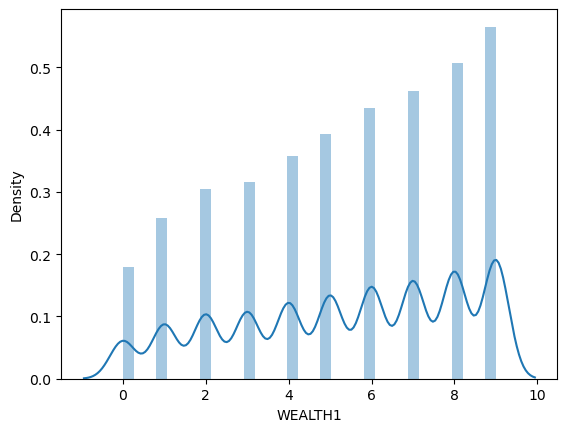

In [31]:
sns.distplot(numerical['WEALTH1'])
plt.show()

In [32]:
numerical['WEALTH1'].median()

6.0

In [33]:
numerical['WEALTH1'].mean()

5.345698500394633

In [34]:
#Replace NaN values by median value for WEALTH1 column
numerical['WEALTH1'] = numerical['WEALTH1'].fillna(6.0)

##### ADI

In [35]:
#numerical['ADI'].value_counts(dropna=False)

In [36]:
numerical['ADI'].value_counts(dropna=False).max()

7296

In [37]:
numerical['ADI'].isna().sum()

132

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


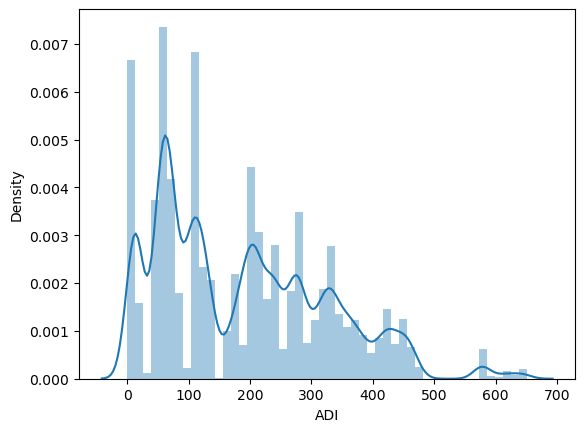

In [38]:
sns.distplot(numerical['ADI'])
plt.show()

In [39]:
numerical['ADI'].mean()

187.35640218303945

In [40]:
numerical['ADI'].median()

175.0

In [41]:
#Replace NaN values by the most frequent one, which is 13
numerical['ADI'] = numerical['ADI'].fillna(13.0)

##### DMA 

In [42]:
#numerical['DMA'].value_counts(dropna=False)

In [43]:
numerical['DMA'].value_counts(dropna=False).max()

7296

In [44]:
numerical['DMA'].isna().sum()

132

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


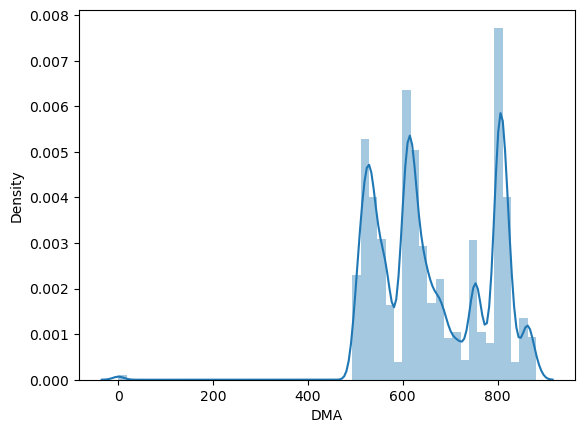

In [45]:
sns.distplot(numerical['DMA'])
plt.show()

In [46]:
numerical['DMA'].mean()

664.0040722082284

In [47]:
numerical['DMA'].median()

635.0

In [48]:
#Replace NaN values by the most frequent one, which is 803
numerical['DMA'] = numerical['DMA'].fillna(803.0)

##### MSA

In [49]:
#numerical['MSA'].value_counts(dropna=False)

In [50]:
numerical['MSA'].value_counts(dropna=False).max()

21333

In [51]:
numerical['MSA'].isna().sum()

132

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


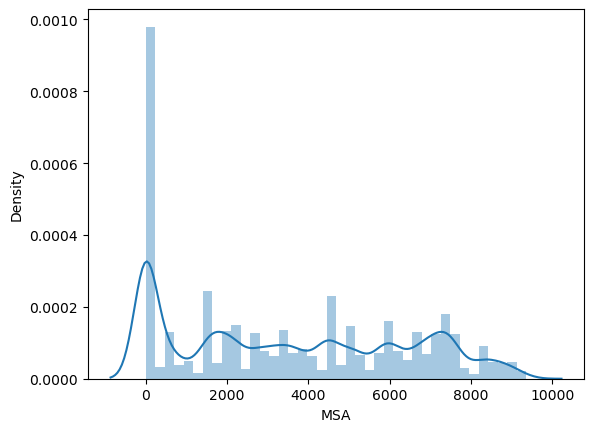

In [52]:
sns.distplot(numerical['MSA'])
plt.show()

In [53]:
#Replace NaN values by the most frequent one, which is 0
numerical['MSA'] = numerical['MSA'].fillna(0.0)

#### Dealing with the rest of the NaN columns in the numerical data

In [54]:
numerical = numerical.apply(lambda x: x.replace(" ", np.NaN))

In [55]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,6.0,0,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,NaN,3.0,1.0,2,0.0,0.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,NaN,1.0,4.0,2,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,1.0,3.0,2.0,60,1.0,0.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [56]:
nulls_percent_df_num = pd.DataFrame(numerical.isna().sum()*100/len(numerical)).reset_index()
nulls_percent_df_num.columns = ['column_name', 'nulls_percentage']

In [57]:
#nulls_percent_df_num

#### all numerical columns with a percentage above 85% for NaN values

In [58]:
columns_above_threshold_num = nulls_percent_df_num[nulls_percent_df_num['nulls_percentage']>85]
columns_above_threshold_num['column_name']

4       NUMCHLD
344     RDATE_3
345     RDATE_4
346     RDATE_5
347     RDATE_6
348     RDATE_7
351    RDATE_10
354    RDATE_13
356    RDATE_15
358    RDATE_17
361    RDATE_20
362    RDATE_21
364    RDATE_23
366     RAMNT_3
367     RAMNT_4
368     RAMNT_5
369     RAMNT_6
370     RAMNT_7
373    RAMNT_10
376    RAMNT_13
378    RAMNT_15
380    RAMNT_17
383    RAMNT_20
384    RAMNT_21
386    RAMNT_23
Name: column_name, dtype: object

In [59]:
drop_columns_list_num = list(columns_above_threshold_num['column_name'])
print(drop_columns_list_num)

['NUMCHLD', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_10', 'RDATE_13', 'RDATE_15', 'RDATE_17', 'RDATE_20', 'RDATE_21', 'RDATE_23', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_10', 'RAMNT_13', 'RAMNT_15', 'RAMNT_17', 'RAMNT_20', 'RAMNT_21', 'RAMNT_23']


#### Drop all numerical columns with NaN values above 85%

In [60]:
numerical = numerical.drop(drop_columns_list_num, axis=1)

In [61]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,6.0,0,NaN,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0.0,0.0,1.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0.0,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1.0,0.0,9.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [62]:
numerical.shape

(95412, 382)

#### Cleaning all NaNs in categorical and numerical data

In [63]:
categorical.isna().sum()

STATE           0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
AGEFLAG     29548
HOMEOWNR    22228
GENDER          0
DATASRCE    21280
GEOCODE     80168
PETS        81086
LIFESRC     54032
PEPSTRFL    50143
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_5       33590
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_10      32748
RFA_11      10422
RFA_12       8923
RFA_13      40219
RFA_14      18867
RFA_15      65477
RFA_16      20417
RFA_17      27650
RFA_18      21263
RFA_19      24492
RFA_20      50200
RFA_21      35212
RFA_22      25648
RFA_23      56274
RFA_24      36973
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2        0
dtype: int64

##### column NOEXCH

In [64]:
categorical.NOEXCH.value_counts(dropna=False)

0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: NOEXCH, dtype: int64

In [65]:
categorical.NOEXCH.value_counts(dropna=False).index

Index(['0', 0, '1', 1, 'X', nan], dtype='object')

In [66]:
# Fill NaNs with the most frequent value, which is '0'
categorical['NOEXCH'] = categorical['NOEXCH'].fillna('0')

In [67]:
categorical.NOEXCH.value_counts(dropna=False)

0    61210
0    33882
1      195
1       90
X       35
Name: NOEXCH, dtype: int64

##### column DOMAIN

In [68]:
categorical.DOMAIN.value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, dtype: int64

In [69]:
# Fill NaNs with the most frequent one
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [70]:
#Split Domain column in DOMAIN A and DOMAIN B and drop original DOMAIN column
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))
categorical = categorical.drop(columns=['DOMAIN'])

##### column CLUSTER

In [71]:
categorical.CLUSTER.value_counts(dropna=False)

40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: CLUSTER, dtype: int64

In [72]:
#fill NaNs with most frequent value
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [73]:
categorical.CLUSTER.value_counts(dropna=False)

40    6295
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: CLUSTER, dtype: int64

##### column AGEFLAG

In [74]:
categorical.AGEFLAG.value_counts(dropna=False)

E      57344
NaN    29548
I       8520
Name: AGEFLAG, dtype: int64

In [75]:
#We have already an age column in the numericals, this column does not give as additional information, so will be dropped
categorical = categorical.drop(columns=['AGEFLAG'])

##### column HOMEOWNR

In [76]:
categorical.HOMEOWNR.value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [77]:
#NaNs will be filled with U for Unknown
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U')

In [78]:
categorical.HOMEOWNR.value_counts(dropna=False)

H    52354
U    43058
Name: HOMEOWNR, dtype: int64

##### column DATASRCE

In [79]:
categorical.DATASRCE.value_counts(dropna=False)

3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64

In [80]:
#Fill NaNs with a 0 (meaning does not belong to 1,2 or 3)
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('0')

In [81]:
categorical.DATASRCE.value_counts(dropna=False)

3    43549
2    23455
0    21280
1     7128
Name: DATASRCE, dtype: int64

##### column GEOCODE

In [82]:
categorical.GEOCODE.value_counts(dropna=False)

NaN    80168
12      3914
3       3327
14      2017
5       1918
4       1622
2       1408
1       1038
Name: GEOCODE, dtype: int64

In [83]:
#we have GEOCODE2 already, so GEOCODE will be dropped
categorical = categorical.drop(columns=['GEOCODE'])

##### column PETS

In [84]:
categorical.PETS.value_counts(dropna=False)

NaN    81086
Y      14326
Name: PETS, dtype: int64

In [85]:
#would assume that the NaNs are supposed to be a N for No
categorical['PETS'] = categorical['PETS'].fillna('N')

##### column LIFESRC

In [86]:
categorical.LIFESRC.value_counts(dropna=False)

NaN    54032
2      20027
3      11479
1       9874
Name: LIFESRC, dtype: int64

In [87]:
#fill NaNs with 0
categorical['LIFESRC'] = categorical['LIFESRC'].fillna('0')

In [88]:
categorical.LIFESRC.value_counts(dropna=False)

0    54032
2    20027
3    11479
1     9874
Name: LIFESRC, dtype: int64

##### column PEPSTRFL

In [89]:
categorical.PEPSTRFL.value_counts(dropna=False)

NaN    50143
X      45269
Name: PEPSTRFL, dtype: int64

In [90]:
#fill NaN with No
categorical['PEPSTRFL'] = categorical['PEPSTRFL'].fillna('No')

##### RFA columns

In [91]:
#just keep RFA_2R and RFA_2A, remove all others
drop_list = []
for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_5',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_10',
 'RFA_11',
 'RFA_12',
 'RFA_13',
 'RFA_14',
 'RFA_15',
 'RFA_16',
 'RFA_17',
 'RFA_18',
 'RFA_19',
 'RFA_20',
 'RFA_21',
 'RFA_22',
 'RFA_23',
 'RFA_24']

In [92]:
categorical = categorical.drop(columns=drop_list)

In [93]:
categorical.isna().sum()

STATE       0
MAILCODE    0
NOEXCH      0
MDMAUD      0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
PETS        0
LIFESRC     0
PEPSTRFL    0
RFA_2R      0
RFA_2A      0
MDMAUD_R    0
MDMAUD_F    0
MDMAUD_A    0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

##### Before going to numericals, try to reduce number of categories

In [94]:
pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

,index,STATE
0,CA,17343
1,FL,8376
2,TX,7535
3,IL,6420
4,MI,5654
5,NC,4160
6,WA,3577
7,GA,3403
8,IN,2980
9,WI,2795


In [95]:
# will group all states below a count of 2500 as other
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])
#other_states
def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [96]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [97]:
categorical.MDMAUD.value_counts(dropna=False)

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64

In [98]:
#will drop column MDMAUD, because we already split that up in MDMAUD_R, MDMAUD_F and MDMAUD_A 
categorical = categorical.drop(columns=['MDMAUD'])

In [99]:
# The other MDMAUD columns also have much more X than actual values and will be dropped
# and CLUSTER will be dropped, since we already have CLUSTER2 in numericals
categorical = categorical.drop(columns=['MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A'])

In [100]:
# and CLUSTER will be dropped, since we already have CLUSTER2 in numericals
categorical = categorical.drop(columns=['CLUSTER'])

In [101]:
categorical.isna().sum()

STATE       0
MAILCODE    0
NOEXCH      0
HOMEOWNR    0
GENDER      0
DATASRCE    0
PETS        0
LIFESRC     0
PEPSTRFL    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
DOMAIN_A    0
DOMAIN_B    0
dtype: int64

#### Dealing with the rest of NaNs in numerical data

In [102]:
numerical.shape

(95412, 382)

In [103]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
7,MBCRAFT,52854
8,MBGARDEN,52854
9,MBBOOKS,52854
10,MBCOLECT,52914
11,MAGFAML,52854
12,MAGFEM,52854
13,MAGMALE,52854
14,PUBGARDN,52854


In [104]:
#drop all ADATE columns
drop_list = [] 
for col_name in numerical.columns:
    if 'ADATE' in col_name:
        drop_list.append(col_name)
numerical = numerical.drop(columns=drop_list)

In [105]:
#drop all RDATE columns:
drop_list = [] 
for col_name in numerical.columns:
    if 'RDATE' in col_name:
        drop_list.append(col_name)
numerical = numerical.drop(columns=drop_list)

In [106]:
#drop all RAMNT columns:
drop_list = [] 
for col_name in numerical.columns:
    if 'RAMNT' in col_name:
        drop_list.append(col_name)
numerical = numerical.drop(columns=drop_list)

In [107]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
7,MBCRAFT,52854
8,MBGARDEN,52854
9,MBBOOKS,52854
10,MBCOLECT,52914
11,MAGFAML,52854
12,MAGFEM,52854
13,MAGMALE,52854
14,PUBGARDN,52854


##### column AGE

In [108]:
#numerical['AGE'].value_counts(dropna=False)

In [109]:
np.mean(numerical['AGE'])

61.61164926756519

In [110]:
#refill NaNs with mean
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))

##### column INCOME

In [111]:
numerical['INCOME'].value_counts(dropna=False)

NaN    21286
5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [112]:
#refill NaNs with most frequent value
numerical['INCOME'] = numerical['INCOME'].fillna(5.0)

In [113]:
numerical['INCOME'].value_counts(dropna=False)

5.0    36737
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64

In [114]:
#remove all columns MB, MAG and PUB, does not help in building the model
drop_list = [] 
for col_name in numerical.columns:
    if 'MB' in col_name:
        drop_list.append(col_name)
    elif 'MAG' in col_name:
        drop_list.append(col_name)
    elif 'PUB' in col_name:
        drop_list.append(col_name)
numerical = numerical.drop(columns=drop_list)

In [115]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
14,WEALTH2,43823
310,NEXTDATE,9973
311,TIMELAG,9973
318,CLUSTER2,132


##### treating the rest of the columns

In [116]:
numerical['WEALTH2'].value_counts(dropna=False)

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [117]:
#fill with mean
numerical['WEALTH2'] = numerical['WEALTH2'].fillna(np.mean(numerical['WEALTH2']))

In [118]:
#numerical['NEXTDATE'].value_counts(dropna=False)

In [119]:
#fill with mean
numerical['NEXTDATE'] = numerical['NEXTDATE'].fillna(np.mean(numerical['NEXTDATE']))

In [120]:
#numerical['TIMELAG'].value_counts(dropna=False)

In [121]:
#fill with mean
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(np.mean(numerical['TIMELAG']))

In [122]:
#numerical['CLUSTER2'].value_counts(dropna=False)

C:\Users\lisab\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


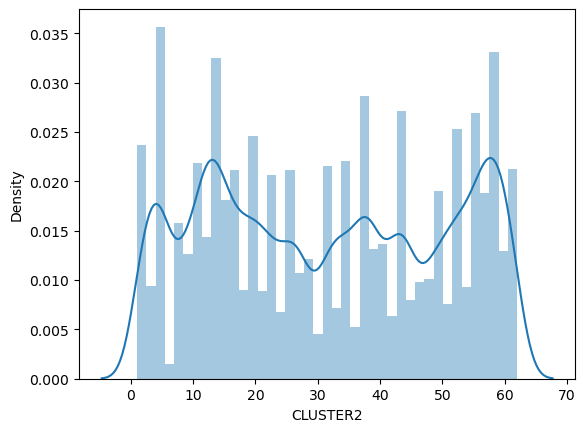

In [123]:
sns.distplot(numerical['CLUSTER2'])
plt.show()

In [124]:
np.mean(numerical['CLUSTER2'])

31.533711167086484

In [125]:
#fill with mean
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.mean(numerical['CLUSTER2']))

In [126]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls


In [127]:
categorical.head(10)

,STATE,MAILCODE,NOEXCH,HOMEOWNR,GENDER,DATASRCE,PETS,LIFESRC,PEPSTRFL,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,IL,A,0,U,F,0,N,0,X,L,E,C,T,2
1,CA,A,0,H,M,3,N,0,No,L,G,A,S,1
2,NC,A,0,U,M,3,N,0,X,L,E,C,R,2
3,CA,A,0,U,F,3,N,0,X,L,E,C,R,2
4,FL,A,0,H,F,3,N,3,No,L,F,A,S,2
5,other,A,0,U,F,0,N,0,X,L,F,C,T,2
6,IN,A,0,H,F,3,Y,3,X,L,E,D,T,2
7,other,A,0,U,F,1,N,0,No,L,E,C,T,2
8,other,A,0,U,M,3,N,0,X,L,F,D,R,2
9,other,A,0,U,M,0,N,0,No,L,F,B,T,1


In [128]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0


In [129]:
categorical.to_csv('categorical.csv', index=False)
numerical.to_csv('numerical.csv', index=False)

## Start of Lab Handling Data Imbalance in Classification Models

In [130]:
categorical = pd.read_csv('categorical.csv')
numerical = pd.read_csv('numerical.csv')

#### Look critically at the dtypes of numerical and categorical columns and make changes where appropriate.

In [131]:
categorical.dtypes

STATE       object
MAILCODE    object
NOEXCH      object
HOMEOWNR    object
GENDER      object
DATASRCE     int64
PETS        object
LIFESRC      int64
PEPSTRFL    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B     int64
dtype: object

In [132]:
categorical['DATASRCE'] = categorical['DATASRCE'].astype('object')
categorical['LIFESRC'] = categorical['LIFESRC'].astype('object')
categorical['DOMAIN_B'] = categorical['DOMAIN_B'].astype('object')

In [133]:
categorical.dtypes

STATE       object
MAILCODE    object
NOEXCH      object
HOMEOWNR    object
GENDER      object
DATASRCE    object
PETS        object
LIFESRC     object
PEPSTRFL    object
RFA_2R      object
RFA_2A      object
GEOCODE2    object
DOMAIN_A    object
DOMAIN_B    object
dtype: object

In [134]:
#numerical.dtypes

#### Concatenate numerical and categorical back together again for your X dataframe. Designate the TargetB as y.

In [135]:
all_data = pd.concat((numerical,categorical),axis=1)

In [136]:
all_data.head(10)

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GENDER,DATASRCE,PETS,LIFESRC,PEPSTRFL,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B
0,8901,0,3712,60.000000,5.0,6.0,0,0,39,34,...,F,0,N,0,X,L,E,C,T,2
1,9401,1,5202,46.000000,6.0,9.0,16,0,15,55,...,M,3,N,0,No,L,G,A,S,1
2,9001,1,0,61.611649,3.0,1.0,2,0,20,29,...,M,3,N,0,X,L,E,C,R,2
3,8701,0,2801,70.000000,1.0,4.0,2,0,23,14,...,F,3,N,0,X,L,E,C,R,2
4,8601,0,2001,78.000000,3.0,2.0,60,1,28,9,...,F,3,N,3,No,L,F,A,S,2
5,9401,0,0,61.611649,5.0,6.0,0,0,26,36,...,F,0,N,0,X,L,F,C,T,2
6,8701,0,6001,38.000000,4.0,6.0,0,0,33,36,...,F,3,Y,3,X,L,E,D,T,2
7,9401,0,0,61.611649,2.0,9.0,1,0,34,36,...,F,1,N,0,No,L,E,C,T,2
8,8801,1,0,61.611649,3.0,2.0,0,0,33,27,...,M,3,N,0,X,L,F,D,R,2
9,9401,1,3211,65.000000,5.0,6.0,0,0,28,51,...,M,0,N,0,No,L,F,B,T,1


In [137]:
#all_data.isna().sum()

In [138]:
X = all_data.drop(columns=['TARGET_B','TARGET_D'])
y = all_data['TARGET_B']

#### Split the data into a training set and a test set.

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Split further into train_num and train_cat. Also test_num and test_cat.

In [140]:
X_train_num = X_train.select_dtypes(np.number)
X_test_num = X_test.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_cat = X_test.select_dtypes(object)

#### Scale the features either by using MinMax Scaler or a Standard Scaler. (train_num, test_num)

In [141]:
#Usage of MinMax Scaler
scaler = MinMaxScaler().fit(X_train_num)

In [142]:
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [143]:
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=list(X_train_num.columns))
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=list(X_test_num.columns))

#### Encode the categorical features using One-Hot Encoding or Ordinal Encoding. (train_cat, test_cat)

In [144]:
#Usage of One-Hot Encoding
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
all_columns = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(), columns=all_columns)
X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(), columns=all_columns)

#### again re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test

In [145]:
X_train = pd.concat((X_train_num_scaled,X_train_cat_encode),axis=1)
X_test = pd.concat((X_test_num_scaled,X_test_cat_encode),axis=1)

In [146]:
X_train.head(10)

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
0,0.641577,0.000000,0.463543,0.536082,0.166667,0.333333,0.024896,0.000000,0.282828,0.282828,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.211470,0.000000,0.207106,0.783505,0.166667,0.666667,0.000000,0.010204,0.363636,0.444444,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.856631,0.000026,0.195778,0.804124,0.666667,0.666667,0.000000,0.000000,0.343434,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.856631,0.000051,0.638620,0.360825,0.666667,0.666667,0.000000,0.000000,0.121212,0.262626,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.856631,0.000000,0.370855,0.628866,0.333333,0.666667,0.000000,0.000000,0.272727,0.303030,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.569892,0.000000,0.618023,0.381443,0.666667,0.888889,0.016598,0.183673,0.262626,0.505051,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,0.784946,0.000000,0.000000,0.624862,0.166667,0.666667,0.000000,0.020408,0.242424,0.676768,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.856631,0.000026,0.226674,0.773196,1.000000,0.444444,0.066390,0.000000,0.444444,0.272727,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.569892,0.000000,0.567456,0.422680,0.666667,0.666667,0.004149,0.000000,0.404040,0.232323,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9,0.928315,0.000026,0.545932,0.453608,0.833333,0.111111,0.004149,0.000000,0.222222,0.272727,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Fit a logistic regression model on the training data.

In [147]:
y_train = y_train.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [148]:
model = LogisticRegression(solver='lbfgs',
                  multi_class='auto', max_iter = 1000).fit(X_train, y_train)

#### Check the accuracy on the test data.

In [149]:
predictions = model.predict(X_test)

In [150]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [151]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[22649,     0],
       [ 1204,     0]], dtype=int64)

In [152]:
display(model.score(X_train, y_train))
display(model.score(X_test, y_test))

0.9491468578375886

0.9495241688676477

In [153]:
print("precision: ",precision_score(y_test,predictions, average='binary', pos_label = 1, labels=[1, 0]))
print("recall: ",recall_score(y_test,predictions, average='binary', pos_label = 1, labels=[1, 0]))
print("f1: ",f1_score(y_test,predictions, average='binary', pos_label = 1, labels=[1, 0]))

precision:  0.0
recall:  0.0
f1:  0.0


C:\Users\lisab\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### The model predicted all data which have been a 1 (1183) with a 0 and all 0 correctly as 0 (22670). This is due to the huge imbalance of the data, there are much more 0 than 1:

#### Check for the imbalance.

In [154]:
all_data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

#### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [155]:
# oversampling / undersampling is only to be done on the TRAINING set
train_set = pd.concat([X_train, y_train],axis=1)
train_set.head(10)

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4,TARGET_B
0,0.641577,0.000000,0.463543,0.536082,0.166667,0.333333,0.024896,0.000000,0.282828,0.282828,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.211470,0.000000,0.207106,0.783505,0.166667,0.666667,0.000000,0.010204,0.363636,0.444444,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
2,0.856631,0.000026,0.195778,0.804124,0.666667,0.666667,0.000000,0.000000,0.343434,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.856631,0.000051,0.638620,0.360825,0.666667,0.666667,0.000000,0.000000,0.121212,0.262626,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.856631,0.000000,0.370855,0.628866,0.333333,0.666667,0.000000,0.000000,0.272727,0.303030,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
5,0.569892,0.000000,0.618023,0.381443,0.666667,0.888889,0.016598,0.183673,0.262626,0.505051,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
6,0.784946,0.000000,0.000000,0.624862,0.166667,0.666667,0.000000,0.020408,0.242424,0.676768,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
7,0.856631,0.000026,0.226674,0.773196,1.000000,0.444444,0.066390,0.000000,0.444444,0.272727,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
8,0.569892,0.000000,0.567456,0.422680,0.666667,0.666667,0.004149,0.000000,0.404040,0.232323,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
9,0.928315,0.000026,0.545932,0.453608,0.833333,0.111111,0.004149,0.000000,0.222222,0.272727,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [166]:
#train_set.isna().sum()

In [157]:
# separate majority/minority classes
category_0 = train_set[train_set['TARGET_B'] == 0]
category_1 = train_set[train_set['TARGET_B'] == 1]

#### Downsampling (undersampling)

In [158]:
from sklearn.utils import resample

In [159]:
category_0_undersampled = resample(category_0, 
                                   replace=True, 
                                   n_samples = len(category_1))

In [160]:
print(category_0_undersampled.shape)
print(category_1.shape)

(3639, 356)
(3639, 356)


In [161]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [162]:
data_downsampled['TARGET_B'].value_counts()

0    3639
1    3639
Name: TARGET_B, dtype: int64

#### Each time fit the model and see how the accuracy of the model has changed.

In [163]:
X_train_under = data_downsampled.drop(['TARGET_B'], axis=1)
y_train_under = data_downsampled['TARGET_B']

In [164]:
X_train_under.head(10)

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
59324,0.498208,0.000000,0.267868,0.731959,0.000000,1.000000,0.012448,0.000000,0.303030,0.313131,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3814,0.426523,0.000051,0.041298,0.958763,0.666667,0.333333,0.000000,0.000000,0.353535,0.141414,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
32251,0.211470,0.000000,0.000000,0.624862,0.666667,0.666667,0.000000,0.010204,0.373737,0.373737,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15933,0.498208,0.025127,0.000000,0.624862,0.666667,0.666667,0.000000,0.000000,0.181818,0.141414,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
10754,0.856631,0.000051,0.257570,0.742268,0.166667,0.888889,0.033195,0.000000,0.414141,0.606061,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
39674,0.211470,0.000026,0.484140,0.515464,0.833333,0.666667,0.000000,0.000000,0.343434,0.303030,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4512,0.928315,0.000026,0.679815,0.319588,0.166667,0.222222,0.000000,0.000000,0.212121,0.404040,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
62627,0.856631,0.000000,0.000000,0.624862,0.666667,0.666667,0.000000,0.000000,0.242424,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
21681,0.354839,0.000000,0.165602,0.824742,0.500000,0.777778,0.074689,0.000000,0.444444,0.101010,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
57423,0.641577,0.000000,0.000000,0.624862,0.666667,0.666667,0.000000,0.000000,0.333333,0.373737,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [167]:
model_under = LogisticRegression(solver='lbfgs',
                  multi_class='auto', max_iter = 1000).fit(X_train_under, y_train_under)

In [168]:
predictions_under = model_under.predict(X_test)

In [169]:
confusion_matrix(y_test, predictions_under)

array([[13269,  9380],
       [  520,   684]], dtype=int64)

In [170]:
display(model.score(X_train_under, y_train_under))
display(model.score(X_test, y_test))

0.5

0.9495241688676477

In [171]:
print("precision: ",precision_score(y_test,predictions_under, average='binary', pos_label = 1, labels=[1, 0]))
print("recall: ",recall_score(y_test,predictions_under, average='binary', pos_label = 1, labels=[1, 0]))
print("f1: ",f1_score(y_test,predictions_under, average='binary', pos_label = 1, labels=[1, 0]))

precision:  0.0679650238473768
recall:  0.5681063122923588
f1:  0.12140575079872204


##### Score of train data got worse (before was approx. 95%), score for test data remains the same, but there were correct predictions now for 1 (can be seen at confusion matrix and that we got scores for precision, recall and f1 higher than 0). Undersampling the 0 seems to be not a good idea, because now more than half of the 0 were falsely predicted as 1 (false positive)

#### Oversampling

In [172]:
# oversample minority
category_1_oversampled = resample(category_1, 
                                    replace=True,            
                                    n_samples = len(category_0))  

In [173]:
print(category_1_oversampled.shape)
print(category_0.shape)

(67920, 356)
(67920, 356)


In [174]:
data_oversampled = pd.concat([category_1_oversampled, category_0], axis=0)

In [175]:
X_train_over = data_oversampled.drop(['TARGET_B'], axis=1)
y_train_over = data_oversampled['TARGET_B']

In [176]:
X_train_over.head(10)

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,...,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,DOMAIN_B_2,DOMAIN_B_3,DOMAIN_B_4
42551,0.211470,0.000026,0.144284,0.855670,0.500000,0.777778,0.161826,0.000000,0.373737,0.303030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62126,0.211470,0.000000,0.278579,0.721649,0.666667,0.666667,0.000000,0.000000,0.343434,0.222222,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9510,0.498208,0.000000,0.000000,0.624862,0.666667,0.666667,0.000000,0.000000,0.515152,0.313131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42820,0.928315,0.000000,0.000000,0.624862,0.000000,0.666667,0.000000,0.000000,0.404040,0.303030,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
68191,0.784946,0.000718,0.000000,0.624862,0.666667,0.666667,0.000000,0.000000,0.191919,0.535354,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8000,0.211470,0.000103,0.196292,0.804124,0.666667,0.777778,0.024896,0.000000,0.464646,0.292929,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
64976,0.211470,0.000077,0.000000,0.624862,0.666667,0.666667,0.000000,0.000000,0.171717,0.121212,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
44875,0.641577,0.000026,0.464264,0.525773,0.666667,0.666667,0.000000,0.020408,0.232323,0.414141,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38151,0.784946,0.000000,0.309063,0.690722,0.333333,1.000000,0.062241,0.000000,0.383838,0.363636,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
71032,0.354839,0.000026,0.247786,0.752577,0.166667,0.666667,0.000000,0.040816,0.313131,0.272727,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [178]:
model_over = LogisticRegression(solver='lbfgs',
                  multi_class='auto', max_iter = 10000).fit(X_train_over, y_train_over)

In [179]:
predictions_over = model_over.predict(X_test)

In [180]:
confusion_matrix(y_test, predictions_over)

array([[14126,  8523],
       [  564,   640]], dtype=int64)

In [181]:
display(model.score(X_train_over, y_train_over))
display(model.score(X_test, y_test))

0.5

0.9495241688676477

In [182]:
print("precision: ",precision_score(y_test,predictions_over, average='binary', pos_label = 1, labels=[1, 0]))
print("recall: ",recall_score(y_test,predictions_over, average='binary', pos_label = 1, labels=[1, 0]))
print("f1: ",f1_score(y_test,predictions_over, average='binary', pos_label = 1, labels=[1, 0]))

precision:  0.06984612026628834
recall:  0.53156146179402
f1:  0.12346869875566702


##### Not quite better than undersampling

#### SMOTE

In [184]:
sm = SMOTE(k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [185]:
model_smote = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000)
model_smote.fit(X_train_SMOTE, y_train_SMOTE)
pred = model_smote.predict(X_test)

print(model_smote.score(X_train, y_train))
print(model_smote.score(X_test, y_test))
print("precision: ",precision_score(y_test,pred, average='binary', pos_label = 1))
print("recall: ",recall_score(y_test,pred, average='binary', pos_label = 1))
print("f1: ",f1_score(y_test,pred, average='binary', pos_label = 1))

0.6170712279377856
0.6137592755628223
precision:  0.06899149714777741
recall:  0.532392026578073
f1:  0.12215340638399236


In [186]:
confusion_matrix(y_test, pred)

array([[13999,  8650],
       [  563,   641]], dtype=int64)

##### Now for 0 and 1 over 50% of cases false predictions were made (either false postive or false negative). 
Reasons could be:
 - multicollinearity between the features (was not checked)